In [21]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 이제 배울 것
- 잠재의미분석 (LSA)
- 차원축소 (SVD)
- 토픽모델링
이 세개는 결국에는 모두 같은 것

# SVD
우리가 구한 dtm을 $X$라고 하자. 이 행렬을 세 개로 분할하는 것이 SVD이다.  
  - $X = U \Sigma V^T$  
  - $X = (m,n)$ m은 단어, n은 documnet개수  

- 행렬별 특징
  - 이때, $\Sigma$는 대각행렬이고, 대각선에서는 $X$의 고유값, 특이값이 들어간다 (eigenvalue). 대각선 내림차순으로 큰 값부터.
  - $U$행렬은 직교행렬.


### SVD
- singular value decomposition

In [4]:
# to import pmi.py

import sys, os
PATH = "/content/drive/MyDrive/01. Programming/Practical NLP/"
sys.path.append(PATH)
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/01. Programming/Practical NLP/',
 '/content/drive/MyDrive/01. Programming/Practical NLP/']

In [5]:
import numpy as np
import pandas as pd

from pmi import *

In [7]:
text = "you say goodbye and i say hello"

In [8]:
doc_idx, word2idx, idx2word = get_indexes(text)
doc_idx

[0, 1, 2, 3, 4, 1, 5]

In [9]:
# 동시발생핼려 만든다
C = create_co_matrix(doc_idx)
C

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int32)

In [11]:
# ppmi 만들어준다
W = ppmi(C)
W

  0%|          | 0/6 [00:00<?, ?it/s]

array([[0.       , 1.5849625, 0.       , 0.       , 0.       , 0.       ],
       [1.5849625, 0.       , 0.5849625, 0.       , 0.5849625, 1.5849625],
       [0.       , 0.5849625, 0.       , 1.5849625, 0.       , 0.       ],
       [0.       , 0.       , 1.5849625, 0.       , 1.5849625, 0.       ],
       [0.       , 0.5849625, 0.       , 1.5849625, 0.       , 0.       ],
       [0.       , 1.5849625, 0.       , 0.       , 0.       , 0.       ]],
      dtype=float32)

In [12]:
U, S, Vt = np.linalg.svd(W)

In [13]:
U.round(3)

array([[-0.452,  0.   ,  0.   , -0.543,  0.654, -0.268],
       [ 0.   , -0.769,  0.64 ,  0.   ,  0.   ,  0.   ],
       [-0.543,  0.   ,  0.   ,  0.452,  0.268,  0.654],
       [-0.   , -0.64 , -0.769,  0.   ,  0.   ,  0.   ],
       [-0.543,  0.   ,  0.   ,  0.452, -0.268, -0.654],
       [-0.452,  0.   ,  0.   , -0.543, -0.654,  0.268]], dtype=float32)

In [14]:
S   # 0빼고 대각선만 나오게끔 된 함수

array([2.6929517e+00, 2.6929517e+00, 1.8656898e+00, 1.8656898e+00,
       2.7921260e-17, 5.6028686e-33], dtype=float32)

In [17]:
print(idx2word[3])
print(W[3])
print(U[3][:-2])

and
[0.        0.        1.5849625 0.        1.5849625 0.       ]
[-5.5511151e-17 -6.3973778e-01 -7.6859325e-01  0.0000000e+00]


In [19]:
U[:, :2]   # topic1과 topic2에 해당하는, 분해된 행렬

array([[-4.5236292e-01,  0.0000000e+00],
       [ 0.0000000e+00, -7.6859325e-01],
       [-5.4347748e-01,  1.8236676e-17],
       [-5.5511151e-17, -6.3973778e-01],
       [-5.4347748e-01,  1.8236676e-17],
       [-4.5236292e-01,  1.3242758e-17]], dtype=float32)

### visualization

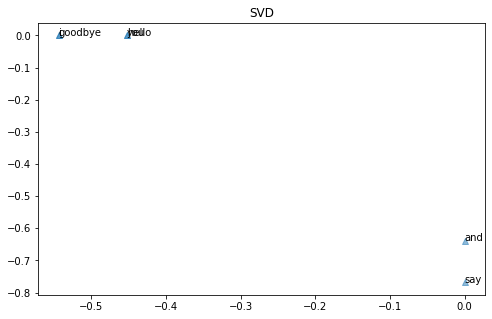

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for word, index in word2idx.items():
  plt.annotate(word, xy=(U[index, 0], U[index, 1]))   # 주석 내용, xy 좌표 설정

plt.scatter(U[:, 0], U[:, 1], alpha=.5, marker='^')
plt.title("SVD")
plt.show()

### TFIDF + SVD
- numpy svd
- sklearn에는 randomized svd, truncated svd

In [24]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

FILE_PATH = "drive/MyDrive/01. Programming/Practical NLP/data/Week 16/cats_and_dogs.txt"
with open(FILE_PATH, "r") as f:
  data = [line.strip() for line in f.readlines()]

len(data)

263

In [25]:
data[:10]

['The Cat in the Hat is not about an animal or a hat.',
 'I wore a hat to the Big Apple party in NYC.',
 'The lion tamer rode on top of the clown car into the ring carrying a chair.',
 'The lion opened his mouth wide as she put her head into his mouth.',
 'The man raised the lion from a cub and they still frolic in the jungle.',
 'There are no lions in NYC, but there are lots of house cats.',
 'The lion, a big cat, is the king of the jungle.',
 "Simba, in Lion King, was inspired by Bambi who wasn't even a cat.",
 "She doesn't like hats in the car but I do.",
 'She rode her bike though central park wearing a hat.']

In [28]:
import nltk
nltk.download('punkt')

tfidf = TfidfVectorizer(tokenizer=word_tokenize,
                        stop_words='english')
dtm = tfidf.fit_transform(data).toarray()
dtm.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(263, 497)

In [30]:
df_dtm = pd.DataFrame(dtm, columns=tfidf.vocabulary_, index=[f'doc {i}' for i in range(dtm.shape[0])])
df_dtm.head(3)

,cat,hat,animal,.,wore,big,apple,party,nyc,lion,tamer,rode,clown,car,ring,carrying,chair,opened,mouth,wide,head,man,raised,cub,frolic,jungle,lions,",",lots,house,cats,king,simba,inspired,bambi,n't,does,like,hats,bike,...,mottled,green,used,young,lab,beat,wall,raw,wag,happy,meat,lizards,kind-of,slimy,grow,held,fido,sleeping,rabbit,race,snapping,won,brother,neighbors,baby,brian,wanted,start,farm,billy,frogs,color,pond,fountain,swim,paw,bit,teeth,gnawed,legs
doc 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450624,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.398197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489637,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
%%time
# 1. numpy svd
U, S, Vt = np.linalg.svd(dtm.T)   # dtm을 전치시켜야됨
U.shape

CPU times: user 67.7 ms, sys: 44.2 ms, total: 112 ms
Wall time: 65 ms


In [35]:
df_svd = pd.DataFrame(U, columns=[f'topic {i}' for i in range(U.shape[1])], index=df_dtm.columns)
df_svd.head(3)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,topic 20,topic 21,topic 22,topic 23,topic 24,topic 25,topic 26,topic 27,topic 28,topic 29,topic 30,topic 31,topic 32,topic 33,topic 34,topic 35,topic 36,topic 37,topic 38,topic 39,...,topic 457,topic 458,topic 459,topic 460,topic 461,topic 462,topic 463,topic 464,topic 465,topic 466,topic 467,topic 468,topic 469,topic 470,topic 471,topic 472,topic 473,topic 474,topic 475,topic 476,topic 477,topic 478,topic 479,topic 480,topic 481,topic 482,topic 483,topic 484,topic 485,topic 486,topic 487,topic 488,topic 489,topic 490,topic 491,topic 492,topic 493,topic 494,topic 495,topic 496
cat,0.032809,0.023146,0.069191,-0.003616,0.165025,-0.001942,0.065398,0.008599,0.095209,0.066685,-0.087399,0.117567,0.173446,-0.054918,-0.062723,0.052244,0.154760,0.101003,0.147116,0.062521,-0.032770,-0.054450,0.044561,-0.318516,-0.075345,0.023112,-0.131724,-0.083926,0.232457,-0.151946,0.025874,0.076748,0.045083,-0.051021,0.107241,-0.048776,0.198248,0.059359,-0.082631,-0.141684,...,4.845989e-17,1.428519e-17,5.932290e-18,3.636650e-17,-1.891883e-18,-4.409460e-18,-2.375324e-18,-1.870109e-16,-1.847625e-19,-5.399015e-18,2.651682e-17,2.741941e-17,1.436279e-17,8.858076e-18,5.307544e-18,5.544564e-17,-1.122586e-17,3.975989e-17,-7.964746e-17,-1.865469e-17,4.524420e-17,-7.474309e-18,2.924481e-17,4.051788e-17,5.300279e-17,1.404808e-16,-7.206160e-18,-2.298632e-17,2.746256e-17,2.121705e-17,1.990633e-18,-1.142118e-17,7.109805e-18,-7.143414e-17,4.567756e-17,-3.672202e-17,-6.568443e-18,2.184159e-17,5.213268e-18,-4.204277e-17
hat,0.005011,0.001786,0.009057,0.004321,-0.000600,0.027389,-0.005526,0.005443,0.004421,-0.003122,0.007080,-0.000167,0.004135,0.001175,-0.000311,-0.000678,0.013521,-0.008821,0.000910,0.008531,0.012185,0.015707,0.004979,0.019142,-0.001425,-0.003768,0.018793,0.001722,-0.009187,-0.001995,0.018602,0.028792,-0.020297,-0.006181,-0.021894,-0.011917,0.023796,0.008211,0.014266,0.001795,...,-2.080424e-03,1.115193e-02,4.012579e-03,1.781205e-02,-2.740088e-03,-9.998225e-03,3.650114e-04,-2.729174e-03,1.735766e-03,-1.690619e-04,5.290964e-03,1.759878e-02,-9.784403e-04,2.853486e-02,5.352147e-03,9.404619e-03,6.031409e-04,-2.443938e-02,1.346680e-02,4.395310e-03,8.100135e-02,-1.293425e-04,6.400795e-02,-1.229415e-02,-2.565046e-03,1.553354e-03,1.136814e-02,1.936877e-03,2.013097e-04,-2.541331e-02,5.524276e-03,4.767201e-03,-4.413970e-01,-5.736002e-04,4.183517e-03,-2.188584e-02,-9.998225e-03,-8.066867e-04,-1.304369e-02,1.169056e-01
animal,0.003232,0.000296,0.007581,0.002072,0.020047,-0.000374,0.012591,-0.005190,0.015996,-0.012544,0.004191,0.010215,0.049253,-0.018116,0.012537,0.011790,0.070303,0.047644,0.078915,0.014598,0.014400,-0.010468,0.040123,-0.146998,-0.031165,-0.011374,-0.037309,-0.034867,0.044349,-0.027716,0.009142,0.049593,0.005544,-0.056289,0.022476,-0.037483,0.027363,-0.001317,-0.002384,-0.023614,...,-5.103970e-17,-5.155630e-17,-2.257379e-17,-7.947868e-18,-1.517436e-17,-5.734289e-18,-6.071380e-17,-1.540059e-17,-4.951591e-17,-1.220029e-17,-6.798597e-18,-3.360470e-17,5.476842e-17,-5.470371e-18,-5.172869e-17,-3.977225e-17,3.020384e-17,-9.215960e-17,-5.874606e-18,-2.449313e-17,4.146056e-18,-2.129941e-17,-5.282137e-17,-1.104535e-17,1.682011e-18,-5.215004e-17,5.388166e-17,1.434607e-19,-7.067597e-18,-2.739784e-17,-3.025708e-18,-1.454122e-18,-8.581121e-18,7.057542e-17,-7.258530e-18,2.576247e-17,4.681497e-19,-3.173251e-17,3.658254e-17,1.217050e-17


In [39]:
df_svd.sort_values('topic 0', ascending=False)['topic 0'][:10]

party     0.491182
ruined    0.449383
bin       0.325229
pot       0.227529
nyc       0.226453
horn      0.212826
apple     0.164889
garage    0.147417
harbor    0.137040
cars      0.110025
Name: topic 0, dtype: float64

In [40]:
# 2. randomized_svd
from sklearn.utils.extmath import randomized_svd

In [42]:
%%time
u, s, vt = randomized_svd(dtm.T, n_components=3, n_iter=3, random_state=0)   # n_components: topic의 개수
u.shape

CPU times: user 12.6 ms, sys: 47 ms, total: 59.6 ms
Wall time: 37.3 ms


In [44]:
df_rsvd = pd.DataFrame(u, columns=[f'topic {i}' for i in range(u.shape[1])], index=df_dtm.columns)
df_rsvd.head(3)

,topic 0,topic 1,topic 2
cat,0.035438,0.012324,-0.065145
hat,0.004864,0.002648,-0.007473
animal,0.003668,-0.002428,-0.003162


In [45]:
df_rsvd.sort_values('topic 0', ascending=False)['topic 0'][:10]

party     0.489611
ruined    0.449807
bin       0.324967
pot       0.228004
nyc       0.227002
horn      0.215290
apple     0.164457
garage    0.146104
harbor    0.140695
cars      0.108934
Name: topic 0, dtype: float64

In [46]:
# 3. truncated svd
from sklearn.decomposition import TruncatedSVD

In [50]:
# 이건 1, 2랑 조금 다름에 유의
%%time
model = TruncatedSVD(n_components=3, n_iter=3)
tsvd = model.fit_transform(dtm.T)
tsvd.shape

CPU times: user 12.3 ms, sys: 15.6 ms, total: 27.9 ms
Wall time: 20.9 ms


In [52]:
df_tsvd = pd.DataFrame(tsvd, columns=[f'topic {i}' for i in range(tsvd.shape[1])], index=df_dtm.columns)
df_tsvd.head(3)

,topic 0,topic 1,topic 2
cat,0.103419,0.059011,0.127526
hat,0.015565,0.004018,0.021817
animal,0.009959,0.001600,0.018100


In [54]:
df_tsvd.sort_values('topic 0', ascending=False)['topic 0'][:10]

party     1.504844
ruined    1.383753
bin       0.994750
pot       0.699921
nyc       0.696368
horn      0.652374
apple     0.508703
garage    0.453243
harbor    0.426086
cars      0.339334
Name: topic 0, dtype: float64

# 실습
- topic = 15 뽑기, iter=100
- dtm으로 넣어서
- doc에 대한 topic이 나오게 출력하시고
- 서로 cosine_similarity를 구해서, 결괏값이 doc vs doc cos value 나오도록
  - spam가지고 sorting 했을 때 spam이 위에 나오도록

In [55]:
FILE_PATH = "drive/MyDrive/01. Programming/Practical NLP/data/Week 15/spam-ham.csv"
df = pd.read_csv(FILE_PATH, index_col=0)
pd.set_option('display.max_colwidth', None)
df.head(3)

,spam,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [103]:
# preprocess with keras
from tensorflow.keras.preprocessing.text import text_to_word_sequence

FILE_PATH = "drive/MyDrive/01. Programming/Practical NLP/data/Week 15/spam-ham.csv"
df = pd.read_csv(FILE_PATH, index_col=0)
pd.set_option('display.max_colwidth', None)

# df['text'] = [" ".join(text_to_word_sequence(i)) for i in df['text']]
# df['text'] = [i.lower() for i in df['text']]
df = df.drop_duplicates()

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import casual_tokenize

tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
dtm = tfidf.fit_transform(df.text).toarray()
dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
### 이 부분이 특잇값 분해 ###

%%time
model = TruncatedSVD(n_components=15, n_iter=100)
tsvd = model.fit_transform(dtm)
print(tsvd.shape)

(4522, 15)
CPU times: user 1min 11s, sys: 22.8 s, total: 1min 34s
Wall time: 48.2 s


In [107]:


df_svd = pd.DataFrame(tsvd, columns=[f'topic {i}' for i in range(tsvd.shape[1])], index=[f'doc {i}' for i in range(tsvd.shape[0])])
df_svd.head(3)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
doc 0,0.116903,0.206750,-0.035974,-0.000025,0.049235,-0.030660,0.089638,-0.075205,-0.005910,-0.033811,-0.002828,0.00428,-0.020493,0.000404,0.058370
doc 1,0.109321,0.385543,-0.107387,0.000544,0.005894,0.114527,0.015851,-0.019891,-0.005782,-0.020991,-0.069389,0.02948,0.039008,0.050580,0.058595
doc 2,0.110298,-0.044942,-0.046285,0.091894,0.078130,0.027079,0.015245,-0.027966,0.013111,0.132904,-0.004035,-0.03107,-0.001612,0.029185,0.029975


In [108]:
df_svd.sort_values('topic 0', ascending=False)['topic 0'][:10]

doc 1465    0.549232
doc 3520    0.543281
doc 278     0.523950
doc 449     0.523334
doc 3918    0.513090
doc 3917    0.506937
doc 1601    0.471198
doc 2622    0.467720
doc 1950    0.464545
doc 3558    0.454876
Name: topic 0, dtype: float64

In [109]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cos = cosine_similarity(tsvd, tsvd)
df_cos = pd.DataFrame(cos, index=df_svd.index, columns=df_svd.index)
df_cos.sort_values('doc 0', ascending=False)['doc 0'][1: 10]

doc 393     0.901502
doc 3900    0.888868
doc 2931    0.876091
doc 2490    0.873922
doc 3130    0.873049
doc 1595    0.866884
doc 2462    0.861642
doc 3824    0.859274
doc 2038    0.853999
Name: doc 0, dtype: float64

### Frequent word (spam vs ham) -> bar plot
- doc-topic
- word-topic
- doc-word frequency (우리가 원하는 것)

In [117]:
len(tfidf.vocabulary_)

9232

In [118]:
df_ = pd.DataFrame(dtm, columns=tfidf.vocabulary_)
df_

,go,until,jurong,point,",",crazy,..,available,only,in,bugis,n,great,world,la,e,buffet,...,cine,there,got,amore,wat,ok,lar,joking,wif,u,oni,free,entry,2,a,wkly,comp,to,win,fa,cup,final,...,compliments,adventuring,chief,gsex,2667,wc1n,3xx,3mobile,chatlines,inclu,servs,l8er,bailiff,mouse,desk,childporn,jumpers,hat,belt,cribbs,spiritual,barring,sudden,influx,kane,shud,pshew,units,accent,4years,dental,nmde,dump,heap,lowes,salesman,08718727200,pity,suggestions,bitching
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.086179,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.127165,0.0,0.0,0.0,0.205511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.374396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.101897,0.132927,0.125113,0.122276,0.000000,0.0,0.000000,0.0,0.042420,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.298637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.119338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,0.089481,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.078988,0.0,0.221906,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131295,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.311431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.239964,0.0,0.128738,0.0,0.090418,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.153500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4520,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000

In [114]:
mask = df.spam.astype(bool).values
mask

array([False, False,  True, ..., False, False, False])

In [115]:
spam_sum = dtm[mask].sum(axis=0)
ham_sum = dtm[~mask].sum(axis=0)
spam_sum, ham_sum

(array([35.47829814,  2.44978873,  0.3563742 , ...,  0.        ,
         0.        ,  0.        ]),
 array([81.1406427 , 19.77012367,  0.738575  , ...,  0.26443542,
         0.26443542,  0.26443542]))

In [121]:
spam = pd.Series(spam_sum, index=df_.columns)
spam

go             35.478298
until           2.449789
jurong          0.356374
point           0.254364
,               0.749694
                 ...    
salesman        0.476249
08718727200     0.000000
pity            0.000000
suggestions     0.000000
bitching        0.000000
Length: 9232, dtype: float64

In [122]:
spam.sort_values(ascending=False)

e             45.464947
risk          36.973375
go            35.478298
lacs.there    31.739757
kane          29.958030
                ...    
letters        0.000000
oranges        0.000000
upd            0.000000
2stoptx        0.000000
flame          0.000000
Length: 9232, dtype: float64

In [124]:
spam_count = pd.DataFrame(data=spam, columns=['count'])
spam_count.head(2)

,count
go,35.478298
until,2.449789


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
data = spam_count.sort_values('count', ascending=False)[:10]
data

,count
e,45.464947
risk,36.973375
go,35.478298
lacs.there,31.739757
kane,29.958030
u,24.354340
flowing,24.015298
07808247860,22.346595
flirting,21.991906
world,19.530624


ValueError: ignored

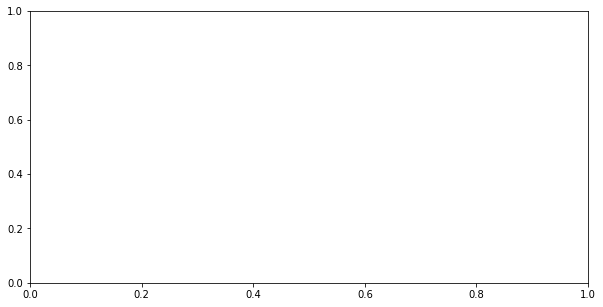

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='word', y='count', data=data, ax=ax)
plt.xticks(rotation='vertical')
plt.show()

# 다음 시간 맛보기

In [ ]:
from pathlib import Path
from bs4 import BeautifulSoup